In [1]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
con = sqlite3.connect("C:/Users/ASUS/Downloads/Resources/zomato_rawdata.sqlite")

In [3]:
df = pd.read_sql_query('SELECT * FROM Users',con)

In [4]:
df.head(4)

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari


In [5]:
df.isnull().sum()

index                              0
url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [6]:
df.isnull().sum() / len(df) * 100

index                           0.000000
url                             0.000000
address                         0.000000
name                            0.000000
online_order                    0.000000
book_table                      0.000000
rate                           15.033741
votes                           0.000000
phone                           2.335789
location                        0.040606
rest_type                       0.438927
dish_liked                     54.291626
cuisines                        0.087012
approx_cost(for two people)     0.669026
reviews_list                    0.000000
menu_item                       0.000000
listed_in(type)                 0.000000
listed_in(city)                 0.000000
dtype: float64

In [7]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', None, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [8]:
df['rate'].replace(('NEW','-'), np.nan ,inplace = True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_24512\2283091446.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rate'].replace(('NEW','-'), np.nan ,inplace = True)


In [9]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', nan, '2.9/5', '3.5/5', None, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [10]:
float('4.1/5'.split('/')[0])

4.1

In [11]:
df['rate'] = df['rate'].apply(lambda x: float(x.split('/')[0]) if type(x)==str else x)

In [12]:
df['rate']

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51712    3.6
51713    NaN
51714    NaN
51715    4.3
51716    3.4
Name: rate, Length: 51717, dtype: float64

Is there a relation between online order and rating of restaurant


In [13]:
df.head(5)

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [14]:
x = pd.crosstab(df['rate'],df['online_order'])

In [15]:
x

online_order,No,Yes
rate,,
1.8,5,0
2.0,11,0
2.1,9,15
2.2,10,16
2.3,29,22
2.4,36,34
2.5,38,63
2.6,83,177
2.7,141,166


<Axes: xlabel='rate'>

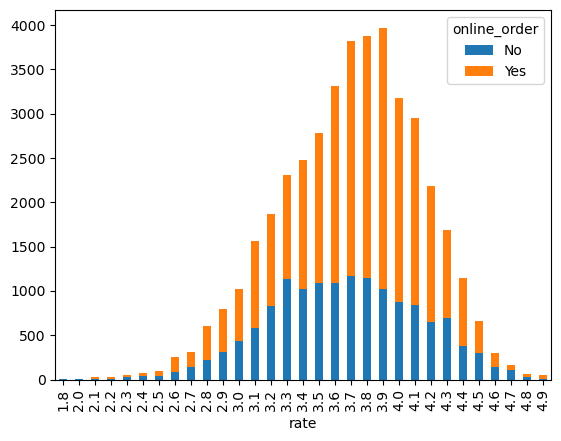

In [16]:
x.plot(kind = 'bar',stacked = True)

In [17]:
x.sum(axis=1).astype(float)

rate
1.8       5.0
2.0      11.0
2.1      24.0
2.2      26.0
2.3      51.0
2.4      70.0
2.5     101.0
2.6     260.0
2.7     307.0
2.8     600.0
2.9     802.0
3.0    1023.0
3.1    1561.0
3.2    1873.0
3.3    2310.0
3.4    2476.0
3.5    2784.0
3.6    3316.0
3.7    3821.0
3.8    3873.0
3.9    3972.0
4.0    3183.0
4.1    2948.0
4.2    2184.0
4.3    1693.0
4.4    1147.0
4.5     656.0
4.6     300.0
4.7     167.0
4.8      66.0
4.9      55.0
dtype: float64

In [18]:
normalize_df = x.div(x.sum(axis=1).astype(float),axis = 0)

<Axes: xlabel='rate'>

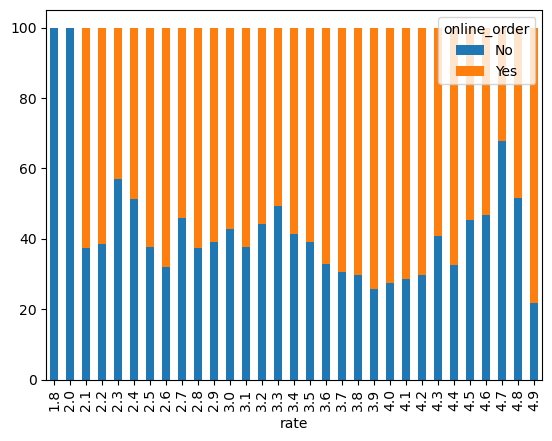

In [19]:
(normalize_df *100).plot(kind='bar',stacked=True)

df['rest_type].isnull().sum()

In [20]:
df['rest_type'].isnull().sum()

227

In [21]:
data = df.dropna(subset = ['rest_type'])

In [22]:
data.isnull().sum()

index                              0
url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            9974
votes                              0
phone                           1183
location                           0
rest_type                          0
dish_liked                     27921
cuisines                          24
approx_cost(for two people)      323
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [23]:
data['rest_type'].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Beverage Shop, Quick Bites', 'Confectionery',
       'Quick Bites, Beverage Shop', 'Dessert Parlor, Sweet Shop',
       'Bakery, Quick Bites', 'Sweet Shop, Quick Bites', 'Kiosk',
       'Food Truck', 'Quick Bites, Dessert Parlor',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Dessert Parlor, Quick Bites',
       'Microbrewery, Casual Dining', 'Lounge', 'Bar, Casual Dining',
       'Food Court', 'Cafe, Bakery', 'Dhaba', 'Quick Bites, Sweet Shop',
       'Microbrewery', 'Food Court, Quick Bites', 'Pub, Bar',
       'Casual Dining, Pub', 'Lounge, Ba

In [24]:
data['rest_type'].str.contains('Quick Bites')

0        False
1        False
2        False
3         True
4        False
         ...  
51712    False
51713    False
51714    False
51715    False
51716    False
Name: rest_type, Length: 51490, dtype: bool

In [25]:
quick_bites_df = data[data['rest_type'].str.contains('Quick Bites')]

In [26]:
quick_bites_df.shape

(20639, 18)

In [27]:
quick_bites_df.columns

Index(['index', 'url', 'address', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [28]:
quick_bites_df['reviews_list']

3        [('Rated 4.0', "RATED\n  Great food and proper...
23       [('Rated 4.0', "RATED\n  So, went here with fr...
26       [('Rated 5.0', 'RATED\n  please provide some e...
31       [('Rated 1.0', "RATED\n  Worst restaurant ever...
34       [('Rated 3.0', 'RATED\n  Not worth for the mon...
                               ...                        
51641    [('Rated 2.0', "RATED\n  Food is not upto the ...
51642                                                   []
51643                                                   []
51644                                                   []
51645    [('Rated 5.0', "RATED\n  I was randomly lookin...
Name: reviews_list, Length: 20639, dtype: object

In [29]:
quick_bites_df['reviews_list'] = quick_bites_df['reviews_list'].apply(lambda x:x.lower())

C:\Users\ASUS\AppData\Local\Temp\ipykernel_24512\4206969916.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quick_bites_df['reviews_list'] = quick_bites_df['reviews_list'].apply(lambda x:x.lower())


In [30]:
from nltk.corpus import RegexpTokenizer

In [31]:
tokenizer = RegexpTokenizer('[a-zA-Z]+')

In [32]:
tokenizer.tokenize(quick_bites_df['reviews_list'][3])

['rated',
 'rated',
 'n',
 'great',
 'food',
 'and',
 'proper',
 'karnataka',
 'style',
 'full',
 'meals',
 'been',
 'there',
 'twice',
 'and',
 'was',
 'fully',
 'satisfied',
 'will',
 'give',
 'stars',
 'if',
 'it',
 's',
 'well',
 'managed',
 'rated',
 'rated',
 'n',
 'reached',
 'the',
 'place',
 'at',
 'pm',
 'on',
 'saturday',
 'half',
 'of',
 'the',
 'items',
 'on',
 'the',
 'menu',
 'were',
 'over',
 'what',
 'was',
 'annoying',
 'was',
 'is',
 'the',
 'food',
 'was',
 'cold',
 'the',
 'taste',
 'was',
 'also',
 'very',
 'average',
 'only',
 'dosa',
 'and',
 'holige',
 'were',
 'good',
 'there',
 'were',
 'very',
 'few',
 'people',
 'in',
 'the',
 'restaurant',
 'and',
 'the',
 'service',
 'was',
 'still',
 'very',
 'slow',
 'the',
 'waiters',
 'were',
 'all',
 'standing',
 'in',
 'one',
 'corner',
 'and',
 'talking',
 'had',
 'to',
 'call',
 'them',
 'repeatedly',
 'rated',
 'rated',
 'n',
 'had',
 'been',
 'here',
 'good',
 'food',
 'served',
 'and',
 'tasty',
 'good',
 'plac

In [33]:
sample = quick_bites_df[0:10000]

In [34]:
review = sample['reviews_list'].apply(tokenizer.tokenize)

In [35]:
review

3        [rated, rated, n, great, food, and, proper, ka...
23       [rated, rated, n, so, went, here, with, friend...
26       [rated, rated, n, please, provide, some, extra...
31       [rated, rated, n, worst, restaurant, ever, veg...
34       [rated, rated, n, not, worth, for, the, money,...
                               ...                        
25000    [rated, rated, n, being, a, loyal, customer, f...
25001    [rated, rated, n, it, was, good, visiting, the...
25007    [rated, rated, n, halal, tag, is, not, there, ...
25008    [rated, rated, n, i, x, x, x, x, x, x, x, x, m...
25009    [rated, rated, n, nit, tasted, like, mint, ric...
Name: reviews_list, Length: 10000, dtype: object

In [36]:
from nltk.corpus import stopwords

In [37]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [38]:
stop = stopwords.words('english')

In [39]:
stop.extend(['rated','n','nan','RATED','Rated'])

In [40]:
review_clean = review.apply(lambda each_view:[token for token in each_view if token not in stop])

In [41]:
review_clean

3        [great, food, proper, karnataka, style, full, ...
23       [went, friends, tea, ambience, striking, say, ...
26       [please, provide, extra, sambal, quantity, les...
31       [worst, restaurant, ever, veg, manchurian, wor...
34       [worth, money, pay, ambience, good, enough, se...
                               ...                        
25000    [loyal, customer, last, two, years, must, say,...
25001    [good, visiting, place, better, compared, hote...
25007    [halal, tag, food, could, haram, restaurants, ...
25008    [x, x, x, x, x, x, x, x, sucker, simple, south...
25009    [nit, tasted, like, mint, rice, hint, chicken,...
Name: reviews_list, Length: 10000, dtype: object

In [42]:
total_review = list(review_clean)

In [43]:
review_1D = []
for review in total_review:
    for word in review:
        review_1D.append(word)

In [44]:
review_1D

['great',
 'food',
 'proper',
 'karnataka',
 'style',
 'full',
 'meals',
 'twice',
 'fully',
 'satisfied',
 'give',
 'stars',
 'well',
 'managed',
 'reached',
 'place',
 'pm',
 'saturday',
 'half',
 'items',
 'menu',
 'annoying',
 'food',
 'cold',
 'taste',
 'also',
 'average',
 'dosa',
 'holige',
 'good',
 'people',
 'restaurant',
 'service',
 'still',
 'slow',
 'waiters',
 'standing',
 'one',
 'corner',
 'talking',
 'call',
 'repeatedly',
 'good',
 'food',
 'served',
 'tasty',
 'good',
 'place',
 'go',
 'freinds',
 'family',
 'first',
 'get',
 'served',
 'well',
 'food',
 'one',
 'good',
 'hotel',
 'price',
 'udupi',
 'restaurant',
 'dirty',
 'floor',
 'walls',
 'waiters',
 'stained',
 'food',
 'cant',
 'clean',
 'floor',
 'even',
 'decorative',
 'colour',
 'paper',
 'every',
 'lot',
 'food',
 'coming',
 'taste',
 'food',
 'pretty',
 'decent',
 'chargw',
 'upset',
 'us',
 'menu',
 'says',
 'serve',
 'thambuli',
 'two',
 'variety',
 'rice',
 'etc',
 'still',
 'charged',
 'us',
 'full'

In [45]:
from collections import Counter

In [46]:
Counter(review_1D).most_common(10)

[('food', 78003),
 ('good', 77130),
 ('place', 61449),
 ('x', 48809),
 ('chicken', 34377),
 ('taste', 31380),
 ('ordered', 24166),
 ('one', 19159),
 ('try', 18888),
 ('like', 18765)]

In [47]:
from nltk import FreqDist

In [48]:
fd = FreqDist()

In [49]:
for word in review_1D:
    fd[word] = fd[word] + 1

In [50]:
fd.most_common(20)

[('food', 78003),
 ('good', 77130),
 ('place', 61449),
 ('x', 48809),
 ('chicken', 34377),
 ('taste', 31380),
 ('ordered', 24166),
 ('one', 19159),
 ('try', 18888),
 ('like', 18765),
 ('also', 18247),
 ('service', 17871),
 ('time', 17138),
 ('order', 16696),
 ('biryani', 15461),
 ('really', 15208),
 ('restaurant', 15060),
 ('best', 14927),
 ('quality', 14466),
 ('great', 14237)]

<Axes: xlabel='Samples', ylabel='Counts'>

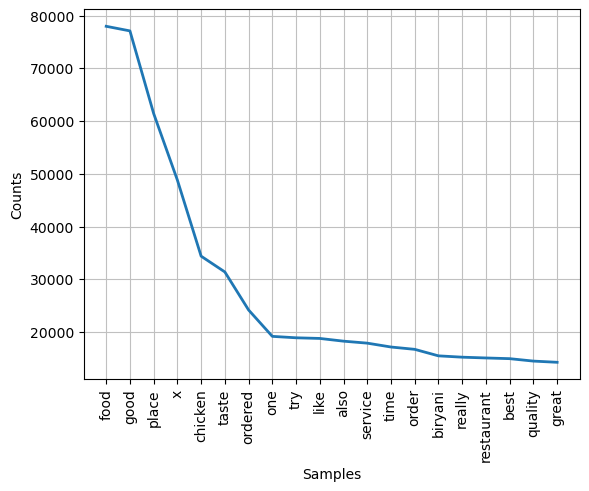

In [51]:
fd.plot(20)

In [52]:
from nltk import FreqDist,bigrams,trigrams

In [53]:
bi_gram = bigrams(review_1D)

In [54]:
fd_bi = FreqDist()

In [55]:
for bigram in bi_gram:
    fd_bi[bigram] = fd_bi[bigram] + 1

In [56]:
fd_bi.most_common(20)

[(('x', 'x'), 42493),
 (('must', 'try'), 5448),
 (('good', 'food'), 5340),
 (('food', 'good'), 5131),
 (('north', 'indian'), 4296),
 (('really', 'good'), 4102),
 (('pocket', 'friendly'), 3840),
 (('taste', 'good'), 3759),
 (('south', 'indian'), 3733),
 (('good', 'place'), 3715),
 (('value', 'money'), 3109),
 (('fried', 'rice'), 3051),
 (('good', 'taste'), 2922),
 (('quality', 'food'), 2857),
 (('one', 'best'), 2690),
 (('also', 'good'), 2672),
 (('visit', 'place'), 2577),
 (('chicken', 'biryani'), 2439),
 (('non', 'veg'), 2420),
 (('indian', 'food'), 2351)]

<Axes: xlabel='Samples', ylabel='Counts'>

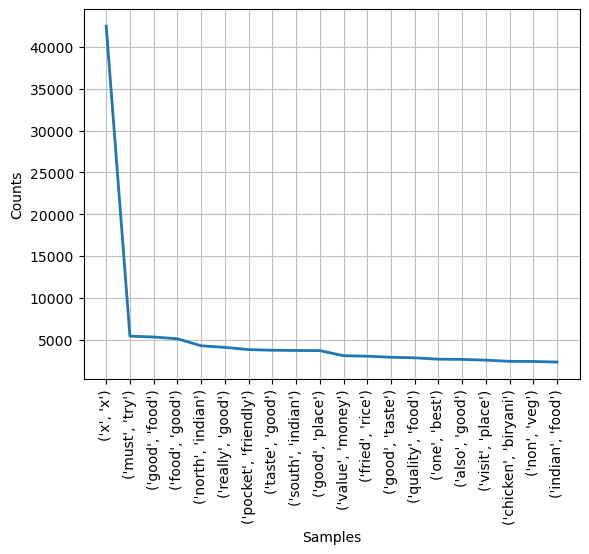

In [57]:
fd_bi.plot(20)

In [58]:
fd_tri = FreqDist()
tri_gram = trigrams(review_1D)

In [59]:
for trigram in tri_gram:
    fd_tri[trigram] = fd_tri[trigram] + 1 

In [60]:
fd_tri.most_common(20)

[(('x', 'x', 'x'), 36545),
 (('north', 'indian', 'food'), 1343),
 (('south', 'indian', 'food'), 824),
 (('paneer', 'butter', 'masala'), 821),
 (('good', 'food', 'good'), 666),
 (('chicken', 'fried', 'rice'), 568),
 (('must', 'visit', 'place'), 563),
 (('ordered', 'chicken', 'biryani'), 555),
 (('worst', 'food', 'ever'), 536),
 (('veg', 'non', 'veg'), 451),
 (('pocket', 'friendly', 'place'), 436),
 (('good', 'value', 'money'), 412),
 (('like', 'home', 'made'), 401),
 (('home', 'made', 'food'), 385),
 (('must', 'try', 'place'), 376),
 (('food', 'really', 'good'), 361),
 (('south', 'indian', 'breakfast'), 355),
 (('good', 'quality', 'food'), 346),
 (('north', 'indian', 'dishes'), 341),
 (('food', 'reasonable', 'price'), 323)]

<Axes: xlabel='Samples', ylabel='Counts'>

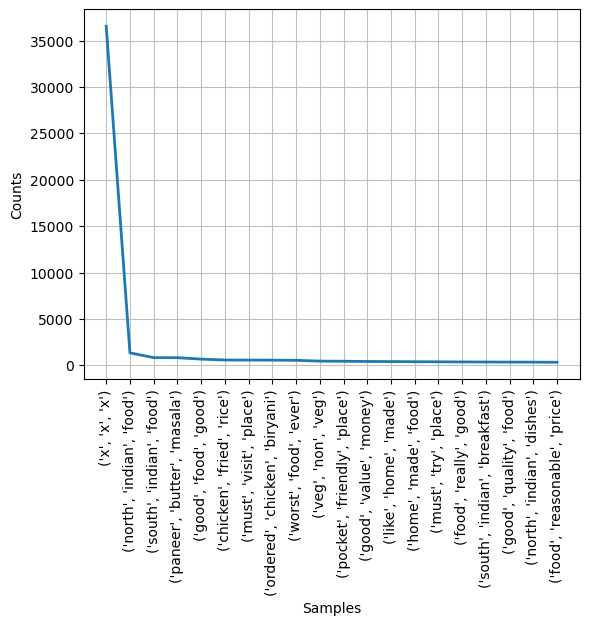

In [61]:
fd_tri.plot(20)

Geospatial Analysis

In [62]:
%pip install geocoder
%pip install geopy


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [63]:
df.head(3)

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari


In [64]:
df['location']

0                      Banashankari
1                      Banashankari
2                      Banashankari
3                      Banashankari
4                      Basavanagudi
                    ...            
51712                    Whitefield
51713                    Whitefield
51714                    Whitefield
51715    ITPL Main Road, Whitefield
51716    ITPL Main Road, Whitefield
Name: location, Length: 51717, dtype: object

In [65]:
df['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', None, 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Sarjapur Road', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Whitefield', 'East Bangalore', 'Old Airport Road',
       'Indiranagar', 'Koramangala 1st Block', 'Frazer Town', 'RT Nagar',
       'MG Road', 'Brigade Road', 'Lavelle Road', 'Church Street',
       'Ulsoor', 'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'HBR Layout', 'Domlur',
       'Ejipura', 'Jeevan

In [66]:
len(df['location'].unique())

94

In [67]:
df['location'] = df['location'] + ', Bangalore,Karnataka,India'

In [68]:
df['location']

0                  Banashankari, Bangalore,Karnataka,India
1                  Banashankari, Bangalore,Karnataka,India
2                  Banashankari, Bangalore,Karnataka,India
3                  Banashankari, Bangalore,Karnataka,India
4                  Basavanagudi, Bangalore,Karnataka,India
                               ...                        
51712                Whitefield, Bangalore,Karnataka,India
51713                Whitefield, Bangalore,Karnataka,India
51714                Whitefield, Bangalore,Karnataka,India
51715    ITPL Main Road, Whitefield, Bangalore,Karnatak...
51716    ITPL Main Road, Whitefield, Bangalore,Karnatak...
Name: location, Length: 51717, dtype: object

In [69]:
df_copy = df.copy()

In [70]:
df_copy['location'].isnull().sum()

21

In [71]:
df_copy = df_copy.dropna(subset=['location'])

In [72]:
df_copy['location'].isnull().sum()

0

In [73]:
locations = pd.DataFrame(df_copy['location'])

In [74]:
locations

,location
0,"Banashankari, Bangalore,Karnataka,India"
1,"Banashankari, Bangalore,Karnataka,India"
2,"Banashankari, Bangalore,Karnataka,India"
3,"Banashankari, Bangalore,Karnataka,India"
4,"Basavanagudi, Bangalore,Karnataka,India"
...,...
51712,"Whitefield, Bangalore,Karnataka,India"
51713,"Whitefield, Bangalore,Karnataka,India"
51714,"Whitefield, Bangalore,Karnataka,India"
51715,"ITPL Main Road, Whitefield, Bangalore,Karnatak..."


In [75]:
locations.columns = ['name']

In [76]:
locations

,name
0,"Banashankari, Bangalore,Karnataka,India"
1,"Banashankari, Bangalore,Karnataka,India"
2,"Banashankari, Bangalore,Karnataka,India"
3,"Banashankari, Bangalore,Karnataka,India"
4,"Basavanagudi, Bangalore,Karnataka,India"
...,...
51712,"Whitefield, Bangalore,Karnataka,India"
51713,"Whitefield, Bangalore,Karnataka,India"
51714,"Whitefield, Bangalore,Karnataka,India"
51715,"ITPL Main Road, Whitefield, Bangalore,Karnatak..."


In [90]:
from geopy.geocoders import Photon

In [91]:
geolocator = Photon(user_agent='pragna_app')

In [93]:
lat = []
lon = []

for place in locations['name']:
    try:
        location = geolocator.geocode(place)
        if location is None:
            lat.append(np.nan)
            lon.append(np.nan)
        else:
            lat.append(location.latitude)
            lon.append(location.longitude)
    except Exception as e:
        lat.append(np.nan)
        lon.append(np.nan)

locations['latitude'] = lat
locations['longitude'] = lon

KeyboardInterrupt: 

In [83]:
locations['latitude'] = lat
locations['longitude'] = long

ValueError: Length of values (0) does not match length of index (51696)

Geographical heat maps

In [ ]:
locations

,name
0,"Banashankari, Bangalore,Karnataka,India"
1,"Banashankari, Bangalore,Karnataka,India"
2,"Banashankari, Bangalore,Karnataka,India"
3,"Banashankari, Bangalore,Karnataka,India"
4,"Basavanagudi, Bangalore,Karnataka,India"
...,...
51712,"Whitefield, Bangalore,Karnataka,India"
51713,"Whitefield, Bangalore,Karnataka,India"
51714,"Whitefield, Bangalore,Karnataka,India"
51715,"ITPL Main Road, Whitefield, Bangalore,Karnatak..."


In [95]:
df.head(4)

,index,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,"Banashankari, Bangalore,Karnataka,India",Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,"Banashankari, Bangalore,Karnataka,India",Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,"Banashankari, Bangalore,Karnataka,India","Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,"Banashankari, Bangalore,Karnataka,India",Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari


In [97]:
df['cuisines'].isnull().sum()

45

In [99]:
df = df.dropna(subset=['cuisines'])

In [102]:
north_india = df[df['cuisines'].str.contains('North Indian')]

In [103]:
north_india.shape

(21085, 18)

In [ ]:
north_india['location'].value_counts().reset_index()

,location,count
0,"BTM, Bangalore,Karnataka,India",2469
1,"HSR, Bangalore,Karnataka,India",1123
2,"Whitefield, Bangalore,Karnataka,India",1059
3,"Marathahalli, Bangalore,Karnataka,India",1038
4,"JP Nagar, Bangalore,Karnataka,India",958
...,...,...
85,"Hebbal, Bangalore,Karnataka,India",4
86,"Jakkur, Bangalore,Karnataka,India",3
87,"Central Bangalore, Bangalore,Karnataka,India",2
88,"West Bangalore, Bangalore,Karnataka,India",1
